In [1]:
import pandas as pd

C:\Users\rohit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data=pd.read_csv("data.csv")

In [3]:
from sklearn.model_selection import train_test_split


features = data[['Calories','FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]
labels = data[['Calories','FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)

Training set - Features: (418013, 9) Target: (418013, 9)
Testing set - Features: (104504, 9) Target: (104504, 9)


# Long Short Term Memory

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    tf.keras.layers.Dense(9)  
])

lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.fit(X_train_lstm, y_train, epochs=15, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2)

lstm_predictions = lstm_model.predict(X_test_lstm)

def evaluate_lstm_model(predictions, y_true):
    lstm_mae = mean_absolute_error(y_true, predictions)
    lstm_mse = mean_squared_error(y_true, predictions)
    lstm_rmse = np.sqrt(lstm_mse)
    lstm_r2 = r2_score(y_true, predictions)

    print("LSTM Model Evaluation:")
    print(f'Mean Absolute Error: {lstm_mae}')
    print(f'Mean Squared Error: {lstm_mse}')
    print(f'Root Mean Squared Error: {lstm_rmse}')
    print(f'R-squared: {lstm_r2}')

evaluate_lstm_model(lstm_predictions, y_test)





Epoch 1/15

13063/13063 - 31s - loss: 2153451.7500 - val_loss: 1179615.2500 - 31s/epoch - 2ms/step
Epoch 2/15
13063/13063 - 33s - loss: 1933236.8750 - val_loss: 1048313.9375 - 33s/epoch - 3ms/step
Epoch 3/15
13063/13063 - 34s - loss: 1781320.5000 - val_loss: 935149.8125 - 34s/epoch - 3ms/step
Epoch 4/15
13063/13063 - 36s - loss: 1567356.7500 - val_loss: 807720.7500 - 36s/epoch - 3ms/step
Epoch 5/15
13063/13063 - 35s - loss: 1323565.1250 - val_loss: 674856.0625 - 35s/epoch - 3ms/step
Epoch 6/15
13063/13063 - 33s - loss: 1086842.1250 - val_loss: 525862.9375 - 33s/epoch - 3ms/step
Epoch 7/15
13063/13063 - 33s - loss: 900221.7500 - val_loss: 432302.3750 - 33s/epoch - 3ms/step
Epoch 8/15
13063/13063 - 32s - loss: 705226.8750 - val_loss: 312420.8438 - 32s/epoch - 2ms/step
Epoch 9/15
13063/13063 - 31s - loss: 512616.8750 - val_loss: 222052.9688 - 31s/epoch - 2ms/step
Epoch 10/15
13063/13063 - 29s - loss: 392750.9062 - val_loss: 164217.1562 - 29s/epoch - 2ms/step
Epoch 11/15
13063/13063 - 3

In [5]:
lstm_mae = mean_absolute_error(y_test, lstm_predictions)
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test, lstm_predictions)

print("LSTM Model Evaluation:")
print(f'Mean Absolute Error: {lstm_mae}')
print(f'Mean Squared Error: {lstm_mse}')
print(f'Root Mean Squared Error: {lstm_rmse}')
print(f'R-squared: {lstm_r2}')

LSTM Model Evaluation:
Mean Absolute Error: 18.309005732750208
Mean Squared Error: 17940.225111164244
Root Mean Squared Error: 133.94112554090415
R-squared: 0.7278216780439994


In [6]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])),
    tf.keras.layers.Dense(9)  
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test), verbose=2)


rnn_predictions = rnn_model.predict(X_test_rnn)

def evaluate_rnn_model(predictions, y_true):
    rnn_mae = mean_absolute_error(y_true, predictions)
    rnn_mse = mean_squared_error(y_true, predictions)
    rnn_rmse = np.sqrt(rnn_mse)
    rnn_r2 = r2_score(y_true, predictions)

    print("RNN Model Evaluation:")
    print(f'Mean Absolute Error: {rnn_mae}')
    print(f'Mean Squared Error: {rnn_mse}')
    print(f'Root Mean Squared Error: {rnn_rmse}')
    print(f'R-squared: {rnn_r2}')

evaluate_rnn_model(rnn_predictions, y_test)


Epoch 1/10
13063/13063 - 33s - loss: 2314949.7500 - val_loss: 1220310.6250 - 33s/epoch - 2ms/step
Epoch 2/10
13063/13063 - 31s - loss: 2001649.2500 - val_loss: 1115251.3750 - 31s/epoch - 2ms/step
Epoch 3/10
13063/13063 - 29s - loss: 1868757.3750 - val_loss: 1023969.1875 - 29s/epoch - 2ms/step
Epoch 4/10
13063/13063 - 29s - loss: 1746546.5000 - val_loss: 952188.6250 - 29s/epoch - 2ms/step
Epoch 5/10
13063/13063 - 28s - loss: 1633868.2500 - val_loss: 864098.5000 - 28s/epoch - 2ms/step
Epoch 6/10
13063/13063 - 29s - loss: 1429844.5000 - val_loss: 748915.6250 - 29s/epoch - 2ms/step
Epoch 7/10
13063/13063 - 32s - loss: 1264608.7500 - val_loss: 648866.7500 - 32s/epoch - 2ms/step
Epoch 8/10
13063/13063 - 32s - loss: 1051696.3750 - val_loss: 543487.2500 - 32s/epoch - 2ms/step
Epoch 9/10
13063/13063 - 33s - loss: 868990.0625 - val_loss: 425704.5312 - 33s/epoch - 3ms/step
Epoch 10/10
13063/13063 - 29s - loss: 672682.6250 - val_loss: 341192.9375 - 29s/epoch - 2ms/step
3266/3266 [=================

In [7]:
rnn_mae = mean_absolute_error(y_test, rnn_predictions)
rnn_mse = mean_squared_error(y_test, rnn_predictions)
rnn_rmse = np.sqrt(rnn_mse)
rnn_r2 = r2_score(y_test, rnn_predictions)

print("RNN Model Evaluation:")
print(f'Mean Absolute Error: {rnn_mae}')
print(f'Mean Squared Error: {rnn_mse}')
print(f'Root Mean Squared Error: {rnn_rmse}')
print(f'R-squared: {rnn_r2}')

RNN Model Evaluation:
Mean Absolute Error: 42.09830890457918
Mean Squared Error: 341192.98301665304
Root Mean Squared Error: 584.1172682061823
R-squared: 0.5965472471277188


In [8]:
import matplotlib.pyplot as plt

models = ['LSTM', 'RNN']

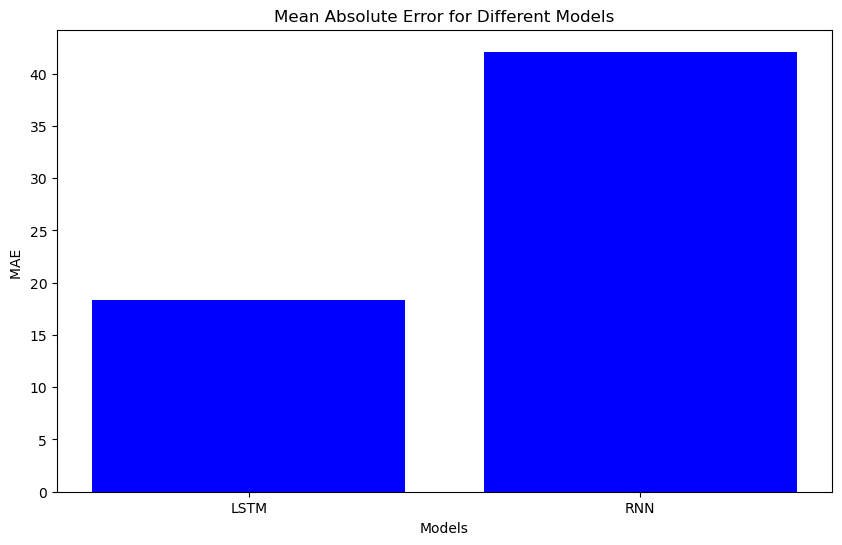

In [9]:
mae = [lstm_mae, rnn_mae]

plt.figure(figsize=(10, 6))
plt.bar(models, mae, color='blue')
plt.xlabel('Models')
plt.ylabel('MAE ')
plt.title('Mean Absolute Error for Different Models')
plt.show()

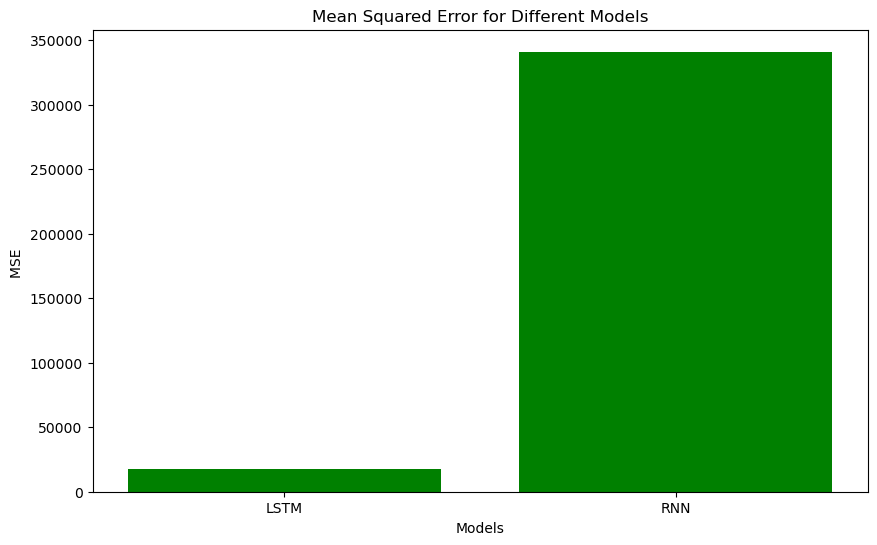

In [10]:
mse = [lstm_mse, rnn_mse]

plt.figure(figsize=(10, 6))
plt.bar(models, mse, color='green')
plt.xlabel('Models')
plt.ylabel('MSE ')
plt.title('Mean Squared Error for Different Models')
plt.show()

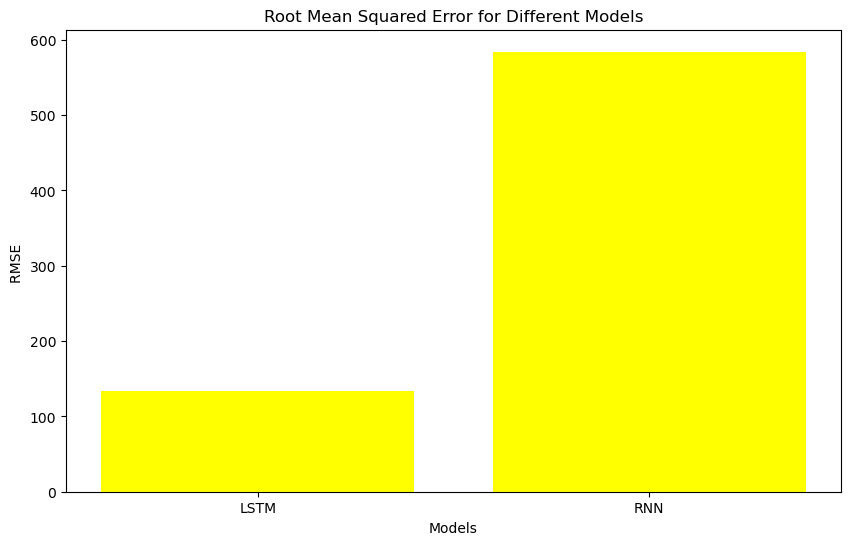

In [11]:
rmse = [lstm_rmse, rnn_rmse]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color='yellow')
plt.xlabel('Models')
plt.ylabel('RMSE ')
plt.title('Root Mean Squared Error for Different Models')
plt.show()

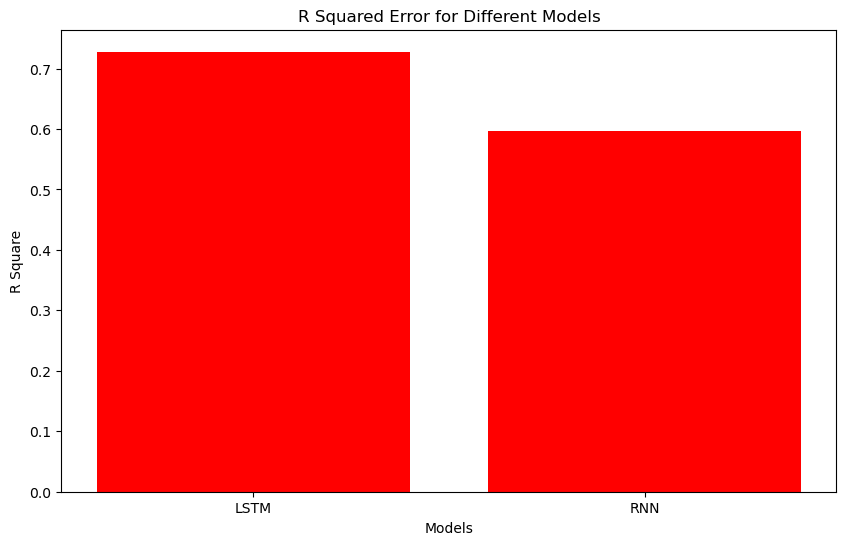

In [12]:
r2 = [lstm_r2, rnn_r2]

plt.figure(figsize=(10, 6))
plt.bar(models, r2, color='red')
plt.xlabel('Models')
plt.ylabel('R Square')
plt.title('R Squared Error for Different Models')
plt.show()